In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,classification_report
from sklearn.linear_model import LinearRegression


In [44]:
df = pd.read_csv('/content/drive/MyDrive/updated_pollution_dataset.csv')
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [13]:
#data types definin

In [14]:
# balanced imbalanced datasets

In [42]:
#write short description of task and data set


print("Dataset Description:")
print("--------------------")

# Get the number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\n")

# Iterate through each column
for col in df.columns:
    print(f"Column Name: {col}")
    print(f"  Data Type: {df[col].dtype}")

    # For numerical columns, print range and basic stats
    if df[col].dtype in ['int64', 'float64']:
        print(f"  Value Range: {df[col].min():.2f} to {df[col].max():.2f}")
        print(f"  Mean: {df[col].mean():.2f}")
        print(f"  Median: {df[col].median():.2f}")
        print(f"  Standard Deviation: {df[col].std():.2f}")
    # For categorical columns, print unique values and their counts
    elif df[col].dtype == 'object' or df[col].dtype == 'category':
        print(f"  Categories: {df[col].unique()}")
        print(f"  Value Counts:\n{df[col].value_counts()}")

    print("\n")

Dataset Description:
--------------------
Number of rows: 5000
Number of columns: 10


Column Name: Temperature
  Data Type: float64
  Value Range: 13.40 to 58.60
  Mean: 30.03
  Median: 29.00
  Standard Deviation: 6.72


Column Name: Humidity
  Data Type: float64
  Value Range: 36.00 to 128.10
  Mean: 70.06
  Median: 69.80
  Standard Deviation: 15.86


Column Name: PM2.5
  Data Type: float64
  Value Range: 0.00 to 295.00
  Mean: 20.14
  Median: 12.00
  Standard Deviation: 24.55


Column Name: PM10
  Data Type: float64
  Value Range: -0.20 to 315.80
  Mean: 30.22
  Median: 21.70
  Standard Deviation: 27.35


Column Name: NO2
  Data Type: float64
  Value Range: 7.40 to 64.90
  Mean: 26.41
  Median: 25.30
  Standard Deviation: 8.90


Column Name: SO2
  Data Type: float64
  Value Range: -6.20 to 44.90
  Mean: 10.01
  Median: 8.00
  Standard Deviation: 6.75


Column Name: CO
  Data Type: float64
  Value Range: 0.65 to 3.72
  Mean: 1.50
  Median: 1.41
  Standard Deviation: 0.55


Column Nam

In [33]:
# Select only the numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

print("Calculating Mean, Median, and Standard Deviation for Numerical Columns:")
for col in numerical_cols:
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_dev_val = df[col].std()
    print(f"\nColumn: {col}")
    print(f"  Mean: {mean_val:.2f}")
    print(f"  Median: {median_val:.2f}")
    print(f"  Standard Deviation: {std_dev_val:.2f}")

Calculating Mean, Median, and Standard Deviation for Numerical Columns:

Column: Temperature
  Mean: 30.03
  Median: 29.00
  Standard Deviation: 6.72

Column: Humidity
  Mean: 70.06
  Median: 69.80
  Standard Deviation: 15.86

Column: PM2.5
  Mean: 20.14
  Median: 12.00
  Standard Deviation: 24.55

Column: PM10
  Mean: 30.22
  Median: 21.70
  Standard Deviation: 27.35

Column: NO2
  Mean: 26.41
  Median: 25.30
  Standard Deviation: 8.90

Column: SO2
  Mean: 10.01
  Median: 8.00
  Standard Deviation: 6.75

Column: CO
  Mean: 1.50
  Median: 1.41
  Standard Deviation: 0.55

Column: Proximity_to_Industrial_Areas
  Mean: 8.43
  Median: 7.90
  Standard Deviation: 3.61

Column: Population_Density
  Mean: 497.42
  Median: 494.00
  Standard Deviation: 152.75


In [34]:
# Count the frequency of each air quality type (for cateogorical value)
air_quality_counts = df['Air Quality'].value_counts()

# Calculate the percentage of each air quality type
air_quality_percentages = df['Air Quality'].value_counts(normalize=True) * 100

# Display the results
print("Frequency of Air Quality Categories:")
print(air_quality_counts)
print("\nPercentage of Air Quality Categories:")
print(air_quality_percentages)

Frequency of Air Quality Categories:
Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

Percentage of Air Quality Categories:
Air Quality
Good         40.0
Moderate     30.0
Poor         20.0
Hazardous    10.0
Name: proportion, dtype: float64


In [37]:
# Calculate the percentage of each air quality type
air_quality_percentages = df['Air Quality'].value_counts(normalize=True) * 100

# Display the results
print("Percentage of Air Quality Categories:")
print(air_quality_percentages)

Percentage of Air Quality Categories:
Air Quality
Good         40.0
Moderate     30.0
Poor         20.0
Hazardous    10.0
Name: proportion, dtype: float64


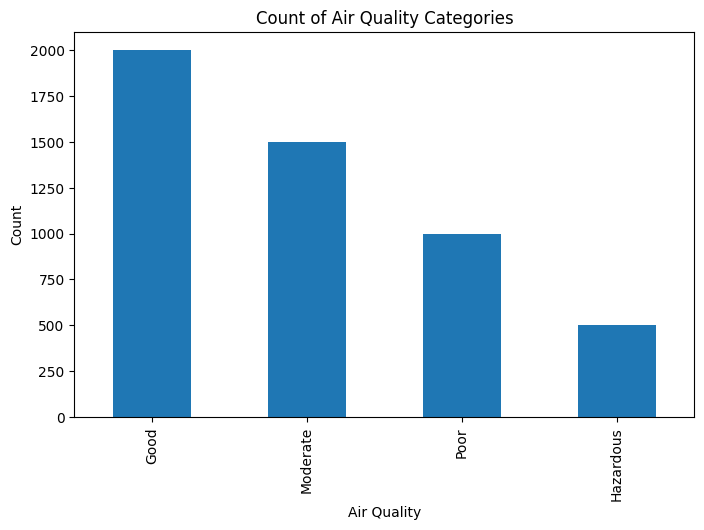

In [18]:
plt.figure(figsize=(8, 5)) #bar chart
df['Air Quality'].value_counts().plot(kind='bar')
plt.xlabel('Air Quality')
plt.ylabel('Count')
plt.title('Count of Air Quality Categories')
plt.show()

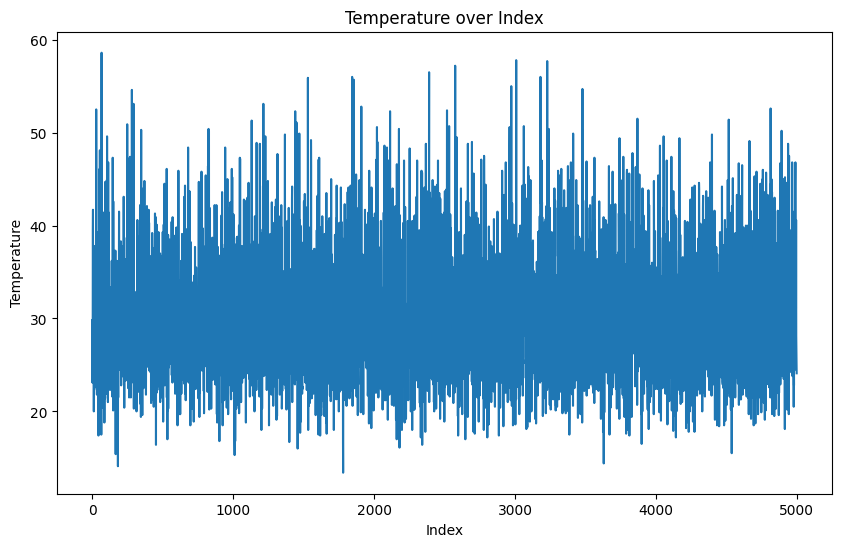

In [38]:
import matplotlib.pyplot as plt #line chart

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Temperature'])
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Temperature over Index')
plt.show()

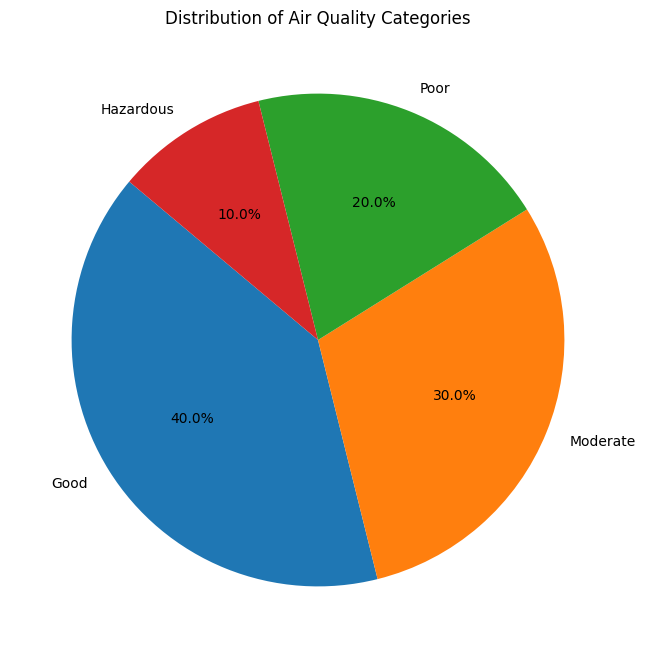

In [39]:
plt.figure(figsize=(8, 8)) #pie chart
df['Air Quality'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Air Quality Categories')
plt.ylabel('') # Remove default y-label
plt.show()

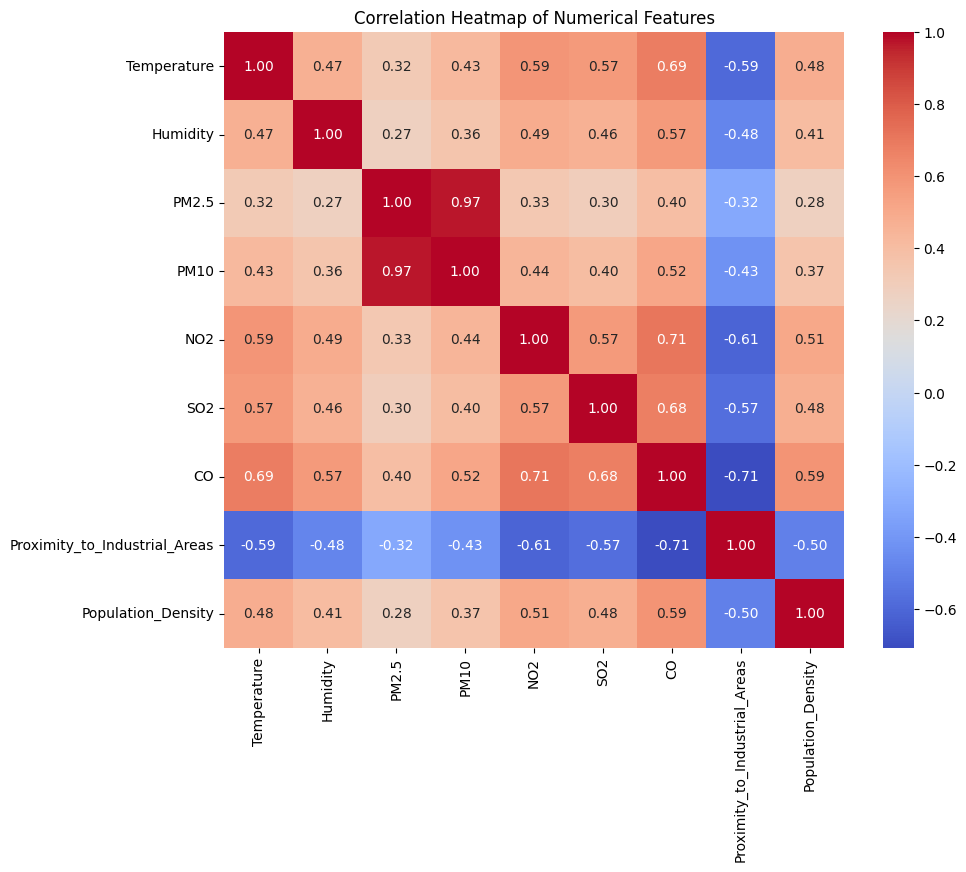

In [21]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [22]:
# cateogiracal data to numerical data converting

#Perform one-hot encoding on the 'Air Quality' column X
df_encoded = pd.get_dummies(df, columns=['Air Quality'], drop_first=False)

# Display the first few rows of the new DataFrame with encoded columns
display(df_encoded.head())

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality_Good,Air Quality_Hazardous,Air Quality_Moderate,Air Quality_Poor
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,False,False,True,False
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,False,False,True,False
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,False,False,True,False
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,True,False,False,False
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,True,False,False,False


In [23]:
df.isnull().sum() #defining missing values

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


In [40]:
# so we can tell the is no missing or null values